In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## Calculating boolean statistics

In [3]:
movie = pd.read_csv('master/data/movie.csv', index_col='movie_title')
movie.head()

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
movie_title,,,,,,,,,,,,,,,,,,,,,
Avatar,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000
Pirates of the Caribbean: At World's End,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0
Spectre,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,...,994.0,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000
The Dark Knight Rises,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,...,2701.0,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000
Star Wars: Episode VII - The Force Awakens,NaN,Doug Walker,NaN,NaN,131.0,NaN,Rob Walker,131.0,NaN,Documentary,...,NaN,NaN,NaN,NaN,NaN,NaN,12.0,7.1,NaN,0


In [4]:
movie_2_hours = movie['duration'] > 120
movie_2_hours.head(10)

movie_title
Avatar                                         True
Pirates of the Caribbean: At World's End       True
Spectre                                        True
The Dark Knight Rises                          True
Star Wars: Episode VII - The Force Awakens    False
John Carter                                    True
Spider-Man 3                                   True
Tangled                                       False
Avengers: Age of Ultron                        True
Harry Potter and the Half-Blood Prince         True
Name: duration, dtype: bool

In [5]:
movie_2_hours.sum()

1039

In [6]:
movie_2_hours.mean()

0.2113506916192026

In [7]:
movie['duration'].dropna().gt(120).mean()

0.21199755152009794

In [8]:
movie_2_hours.describe()

count      4916
unique        2
top       False
freq       3877
Name: duration, dtype: object

In [9]:
# Proof
movie_2_hours.value_counts(normalize=True)

False    0.788649
True     0.211351
Name: duration, dtype: float64

In [10]:
actors = movie[['actor_1_facebook_likes',
                'actor_2_facebook_likes']].dropna()

In [11]:
(actors['actor_1_facebook_likes'] >
 actors['actor_2_facebook_likes']).mean()

0.9777687130328371

## Constructing multiple boolean conditions

In [12]:
#    Python and   or    not
#  = Pandas  &    |      ~
# and require () in Pandas
criteria1 = movie.imdb_score > 8
criteria2 = movie.content_rating == 'PG-13'
criteria3 = ((movie.title_year < 2000) |
             (movie.title_year > 2009))

In [13]:
criteria2.head()

movie_title
Avatar                                         True
Pirates of the Caribbean: At World's End       True
Spectre                                        True
The Dark Knight Rises                          True
Star Wars: Episode VII - The Force Awakens    False
Name: content_rating, dtype: bool

In [14]:
criteria_final = criteria1 & criteria2 & criteria3
criteria_final.head()

movie_title
Avatar                                        False
Pirates of the Caribbean: At World's End      False
Spectre                                       False
The Dark Knight Rises                          True
Star Wars: Episode VII - The Force Awakens    False
dtype: bool

In [15]:
# In python comparison characters have higher precedence
# In Pandas bitwise operator &, |, ~ have higher precedence, thus the need for parenthesis in Pandas

In [16]:
# movie.title_year < 2000 | movie.title_year > 2009
# will raise TypeError

## Filtering with boolean indexing

In [17]:
movie = pd.read_csv('master/data/movie.csv', index_col='movie_title')
crit_a1 = movie.imdb_score > 8
crit_a2 = movie.content_rating == 'PG-13'
crit_a3 = (movie.title_year < 2000) | (movie.title_year > 2009)
final_crit_a = crit_a1 & crit_a2 & crit_a3

In [18]:
crit_b1 = movie.imdb_score < 5
crit_b2 = movie.content_rating == 'R'
crit_b3 = (movie.title_year >= 2000) | (movie.title_year <= 2010)
final_crit_b = crit_b1 & crit_b2 & crit_b3

In [19]:
final_crit_all = final_crit_a | final_crit_b
final_crit_all.head()

movie_title
Avatar                                        False
Pirates of the Caribbean: At World's End      False
Spectre                                       False
The Dark Knight Rises                          True
Star Wars: Episode VII - The Force Awakens    False
dtype: bool

In [20]:
movie[final_crit_all].head()

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
movie_title,,,,,,,,,,,,,,,,,,,,,
The Dark Knight Rises,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,...,2701.0,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000
The Avengers,Color,Joss Whedon,703.0,173.0,0.0,19000.0,Robert Downey Jr.,26000.0,623279547.0,Action|Adventure|Sci-Fi,...,1722.0,English,USA,PG-13,220000000.0,2012.0,21000.0,8.1,1.85,123000
Captain America: Civil War,Color,Anthony Russo,516.0,147.0,94.0,11000.0,Scarlett Johansson,21000.0,407197282.0,Action|Adventure|Sci-Fi,...,1022.0,English,USA,PG-13,250000000.0,2016.0,19000.0,8.2,2.35,72000
The Lovers,Color,Roland Joffé,10.0,109.0,596.0,283.0,Alice Englert,622.0,NaN,Action|Adventure|Romance|Sci-Fi,...,15.0,English,Belgium,R,NaN,2015.0,525.0,4.5,NaN,677
Guardians of the Galaxy,Color,James Gunn,653.0,121.0,571.0,3000.0,Vin Diesel,14000.0,333130696.0,Action|Adventure|Sci-Fi,...,1097.0,English,USA,PG-13,170000000.0,2014.0,14000.0,8.1,2.35,96000


In [21]:
# Let's check
cols = ['imdb_score', 'content_rating', 'title_year']
movie_filtered = movie.loc[final_crit_all, cols]
movie_filtered.head(10)

,imdb_score,content_rating,title_year
movie_title,,,
The Dark Knight Rises,8.5,PG-13,2012.0
The Avengers,8.1,PG-13,2012.0
Captain America: Civil War,8.2,PG-13,2016.0
The Lovers,4.5,R,2015.0
Guardians of the Galaxy,8.1,PG-13,2014.0
Interstellar,8.6,PG-13,2014.0
Inception,8.8,PG-13,2010.0
The Martian,8.1,PG-13,2015.0
Town & Country,4.4,R,2001.0


## Replicating boolean indexing with index selection

In [22]:
college = pd.read_csv('master/data/college.csv')

# Nous savons que lorsque nous passons a l'indexing operator une Serie de même index qu'un DF et composée de booléens,
# on obtiens en retour un DF filtré selon les booléens.

college[college['STABBR'] == 'TX'].head()

,INSTNM,CITY,STABBR,HBCU,MENONLY,WOMENONLY,RELAFFIL,SATVRMID,SATMTMID,DISTANCEONLY,...,UGDS_2MOR,UGDS_NRA,UGDS_UNKN,PPTUG_EF,CURROPER,PCTPELL,PCTFLOAN,UG25ABV,MD_EARN_WNE_P10,GRAD_DEBT_MDN_SUPP
3610,Abilene Christian University,Abilene,TX,0.0,0.0,0.0,1,530.0,545.0,0.0,...,0.0454,0.0423,0.0045,0.0468,1,0.2595,0.5527,0.0381,40200,25985
3611,Alvin Community College,Alvin,TX,0.0,0.0,0.0,0,NaN,NaN,0.0,...,0.0002,0.0000,0.0143,0.7123,1,0.1549,0.0625,0.2841,34500,6750
3612,Amarillo College,Amarillo,TX,0.0,0.0,0.0,0,NaN,NaN,0.0,...,0.0000,0.0001,0.0085,0.6922,1,0.3786,0.1573,0.3431,31700,10950
3613,Angelina College,Lufkin,TX,0.0,0.0,0.0,0,NaN,NaN,0.0,...,0.0264,0.0005,0.0000,0.5600,1,0.5308,0.0000,0.2603,26900,PrivacySuppressed
3614,Angelo State University,San Angelo,TX,0.0,0.0,0.0,0,475.0,490.0,0.0,...,0.0285,0.0331,0.0011,0.1289,1,0.4068,0.5279,0.1407,37700,21319.5


In [23]:
college2 = college.set_index('STABBR')

# Un index n'est pas forcément compsé d'éléments uniques.

college2.loc['TX'].head()

,INSTNM,CITY,HBCU,MENONLY,WOMENONLY,RELAFFIL,SATVRMID,SATMTMID,DISTANCEONLY,UGDS,...,UGDS_2MOR,UGDS_NRA,UGDS_UNKN,PPTUG_EF,CURROPER,PCTPELL,PCTFLOAN,UG25ABV,MD_EARN_WNE_P10,GRAD_DEBT_MDN_SUPP
STABBR,,,,,,,,,,,,,,,,,,,,,
TX,Abilene Christian University,Abilene,0.0,0.0,0.0,1,530.0,545.0,0.0,3572.0,...,0.0454,0.0423,0.0045,0.0468,1,0.2595,0.5527,0.0381,40200,25985
TX,Alvin Community College,Alvin,0.0,0.0,0.0,0,NaN,NaN,0.0,4682.0,...,0.0002,0.0000,0.0143,0.7123,1,0.1549,0.0625,0.2841,34500,6750
TX,Amarillo College,Amarillo,0.0,0.0,0.0,0,NaN,NaN,0.0,9346.0,...,0.0000,0.0001,0.0085,0.6922,1,0.3786,0.1573,0.3431,31700,10950
TX,Angelina College,Lufkin,0.0,0.0,0.0,0,NaN,NaN,0.0,3825.0,...,0.0264,0.0005,0.0000,0.5600,1,0.5308,0.0000,0.2603,26900,PrivacySuppressed
TX,Angelo State University,San Angelo,0.0,0.0,0.0,0,475.0,490.0,0.0,5290.0,...,0.0285,0.0331,0.0011,0.1289,1,0.4068,0.5279,0.1407,37700,21319.5


In [24]:
%timeit college[college['STABBR'] == 'TX']

1.28 ms ± 28.9 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [25]:
# Simply using basic label-based index selection with .loc is much faster than boolean selection.

%timeit college2.loc['TX']

589 µs ± 12.7 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [26]:
%timeit college2 = college.set_index('STABBR')

1.83 ms ± 39.4 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [27]:
states = ['TX', 'CA', 'NY']
college[college['STABBR'].isin(states)]

,INSTNM,CITY,STABBR,HBCU,MENONLY,WOMENONLY,RELAFFIL,SATVRMID,SATMTMID,DISTANCEONLY,...,UGDS_2MOR,UGDS_NRA,UGDS_UNKN,PPTUG_EF,CURROPER,PCTPELL,PCTFLOAN,UG25ABV,MD_EARN_WNE_P10,GRAD_DEBT_MDN_SUPP
192,Academy of Art University,San Francisco,CA,0.0,0.0,0.0,0,NaN,NaN,0.0,...,0.0249,0.2523,0.2098,0.4334,1,0.4008,0.5524,0.4043,36000,35093
193,ITT Technical Institute-Rancho Cordova,Rancho Cordova,CA,0.0,0.0,0.0,0,NaN,NaN,0.0,...,0.0400,0.0000,0.1780,0.2540,0,0.7137,0.7667,0.7235,38800,25827.5
194,Academy of Chinese Culture and Health Sciences,Oakland,CA,0.0,0.0,0.0,0,NaN,NaN,0.0,...,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,PrivacySuppressed
195,The Academy of Radio and TV Broadcasting,Huntington Beach,CA,0.0,0.0,0.0,0,NaN,NaN,0.0,...,0.0000,0.0000,0.0000,0.0000,1,0.9579,1.0000,0.4545,28400,9500
196,Avalon School of Cosmetology-Alameda,Alameda,CA,0.0,0.0,0.0,0,NaN,NaN,0.0,...,0.0553,0.0000,0.0435,0.5099,1,0.7407,0.6768,0.3387,21600,9860
197,College of Alameda,Alameda,CA,0.0,0.0,0.0,0,NaN,NaN,0.0,...,0.0473,0.0076,0.0500,0.8440,1,0.2273,0.0117,0.3940,31900,PrivacySuppressed
198,Allan Hancock College,Santa Maria,CA,0.0,0.0,0.0,0,NaN,NaN,0.0,...,0.0312,0.0021,0.0005,0.6630,1,0.2531,0.0231,0.3713,29800,10500
199,American Academy of Dramatic Arts-Los Angeles,Los Angeles,CA,0.0,0.0,0.0,0,NaN,NaN,0.0,...,0.1321,0.2429,0.0071,0.0000,1,0.5039,0.6008,0.1589,27800,12000
200,American Baptist Seminary of the West,Berkeley,CA,0.0,0.0,0.0,1,NaN,NaN,0.0,...,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,PrivacySuppressed
201,American Film Institute Conservatory,Los Angeles,CA,0.0,0.0,0.0,0,NaN,NaN,0.0,...,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,PrivacySuppressed


In [28]:
college2.loc[states]

,INSTNM,CITY,HBCU,MENONLY,WOMENONLY,RELAFFIL,SATVRMID,SATMTMID,DISTANCEONLY,UGDS,...,UGDS_2MOR,UGDS_NRA,UGDS_UNKN,PPTUG_EF,CURROPER,PCTPELL,PCTFLOAN,UG25ABV,MD_EARN_WNE_P10,GRAD_DEBT_MDN_SUPP
STABBR,,,,,,,,,,,,,,,,,,,,,
TX,Abilene Christian University,Abilene,0.0,0.0,0.0,1,530.0,545.0,0.0,3572.0,...,0.0454,0.0423,0.0045,0.0468,1,0.2595,0.5527,0.0381,40200,25985
TX,Alvin Community College,Alvin,0.0,0.0,0.0,0,NaN,NaN,0.0,4682.0,...,0.0002,0.0000,0.0143,0.7123,1,0.1549,0.0625,0.2841,34500,6750
TX,Amarillo College,Amarillo,0.0,0.0,0.0,0,NaN,NaN,0.0,9346.0,...,0.0000,0.0001,0.0085,0.6922,1,0.3786,0.1573,0.3431,31700,10950
TX,Angelina College,Lufkin,0.0,0.0,0.0,0,NaN,NaN,0.0,3825.0,...,0.0264,0.0005,0.0000,0.5600,1,0.5308,0.0000,0.2603,26900,PrivacySuppressed
TX,Angelo State University,San Angelo,0.0,0.0,0.0,0,475.0,490.0,0.0,5290.0,...,0.0285,0.0331,0.0011,0.1289,1,0.4068,0.5279,0.1407,37700,21319.5
TX,Arlington Baptist College,Arlington,0.0,0.0,0.0,1,NaN,NaN,0.0,214.0,...,0.0000,0.0047,0.0000,0.1682,1,0.4978,0.4892,0.2251,34200,22905
TX,Arlington Career Institute,Grand Prairie,0.0,0.0,0.0,0,NaN,NaN,0.0,204.0,...,0.0000,0.0000,0.0000,0.2843,1,0.6186,0.7119,0.7745,27600,9500
TX,The Art Institute of Houston,Houston,0.0,0.0,0.0,0,NaN,NaN,0.0,1887.0,...,0.0000,0.0000,0.0419,0.3466,1,0.6183,0.7604,0.3845,32600,30750
TX,Austin College,Sherman,0.0,0.0,0.0,1,600.0,595.0,0.0,1272.0,...,0.0031,0.0267,0.0031,0.0016,1,0.2867,0.7581,0.0124,47800,26000


## Selecting with unique and sorted indexes

In [29]:
college = pd.read_csv('master/data/college.csv')
college2 = college.set_index('STABBR')
college2.index.is_monotonic

False

In [30]:
college3 = college2.sort_index()
college3.index.is_monotonic

True

In [31]:
%timeit college[college['STABBR'] == 'TX']

1.32 ms ± 60 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [32]:
%timeit college2.loc['TX']

605 µs ± 27.3 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [33]:
%timeit college3.loc['TX']

186 µs ± 6 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)


In [34]:
college_unique = college.set_index('INSTNM')
college_unique.index.is_unique

True

In [35]:
college[college['INSTNM'] == 'Stanford University']

,INSTNM,CITY,STABBR,HBCU,MENONLY,WOMENONLY,RELAFFIL,SATVRMID,SATMTMID,DISTANCEONLY,...,UGDS_2MOR,UGDS_NRA,UGDS_UNKN,PPTUG_EF,CURROPER,PCTPELL,PCTFLOAN,UG25ABV,MD_EARN_WNE_P10,GRAD_DEBT_MDN_SUPP
4217,Stanford University,Stanford,CA,0.0,0.0,0.0,0,730.0,745.0,0.0,...,0.1067,0.0819,0.0031,0.0,1,0.1556,0.1256,0.0401,86000,12782


In [36]:
college_unique.loc ['Stanford University']

CITY                  Stanford
STABBR                      CA
HBCU                         0
MENONLY                      0
WOMENONLY                    0
RELAFFIL                     0
SATVRMID                   730
SATMTMID                   745
DISTANCEONLY                 0
UGDS                      7018
UGDS_WHITE              0.3752
UGDS_BLACK              0.0591
UGDS_HISP               0.1607
UGDS_ASIAN              0.1979
UGDS_AIAN               0.0114
UGDS_NHPI               0.0038
UGDS_2MOR               0.1067
UGDS_NRA                0.0819
UGDS_UNKN               0.0031
PPTUG_EF                     0
CURROPER                     1
PCTPELL                 0.1556
PCTFLOAN                0.1256
UG25ABV                 0.0401
MD_EARN_WNE_P10          86000
GRAD_DEBT_MDN_SUPP       12782
Name: Stanford University, dtype: object

In [37]:
%timeit college[college['INSTNM'] == 'Stanford University']

1.16 ms ± 16.3 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [38]:
%timeit college_unique.loc ['Stanford University']

154 µs ± 5.73 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)


In [39]:
# Concatenation
college.index = college['CITY'] + ', ' + college['STABBR']
college = college.sort_index()
college.head()

,INSTNM,CITY,STABBR,HBCU,MENONLY,WOMENONLY,RELAFFIL,SATVRMID,SATMTMID,DISTANCEONLY,...,UGDS_2MOR,UGDS_NRA,UGDS_UNKN,PPTUG_EF,CURROPER,PCTPELL,PCTFLOAN,UG25ABV,MD_EARN_WNE_P10,GRAD_DEBT_MDN_SUPP
"ARTESIA, CA",Angeles Institute,ARTESIA,CA,0.0,0.0,0.0,0,NaN,NaN,0.0,...,0.0175,0.0088,0.0088,0.0000,1,0.6275,0.8138,0.5429,NaN,16850
"Aberdeen, SD",Presentation College,Aberdeen,SD,0.0,0.0,0.0,1,440.0,480.0,0.0,...,0.0284,0.0142,0.0823,0.2865,1,0.4829,0.7560,0.3097,35900,25000
"Aberdeen, SD",Northern State University,Aberdeen,SD,0.0,0.0,0.0,0,480.0,475.0,0.0,...,0.0219,0.0425,0.0024,0.1872,1,0.2272,0.4303,0.1766,33600,24847
"Aberdeen, WA",Grays Harbor College,Aberdeen,WA,0.0,0.0,0.0,0,NaN,NaN,0.0,...,0.0937,0.0009,0.0250,0.1820,1,0.4530,0.1502,0.5087,27000,11490
"Abilene, TX",Hardin-Simmons University,Abilene,TX,0.0,0.0,0.0,1,508.0,515.0,0.0,...,0.0298,0.0159,0.0102,0.0685,1,0.3256,0.5547,0.0982,38700,25864


In [40]:
college.loc['Miami, FL'].head()

,INSTNM,CITY,STABBR,HBCU,MENONLY,WOMENONLY,RELAFFIL,SATVRMID,SATMTMID,DISTANCEONLY,...,UGDS_2MOR,UGDS_NRA,UGDS_UNKN,PPTUG_EF,CURROPER,PCTPELL,PCTFLOAN,UG25ABV,MD_EARN_WNE_P10,GRAD_DEBT_MDN_SUPP
"Miami, FL",New Professions Technical Institute,Miami,FL,0.0,0.0,0.0,0,NaN,NaN,0.0,...,0.0000,0.0,0.0,0.4464,1,0.8701,0.6780,0.8358,18700,8682
"Miami, FL",Management Resources College,Miami,FL,0.0,0.0,0.0,0,NaN,NaN,0.0,...,0.0000,0.0,0.0,0.0000,1,0.4239,0.5458,0.8698,PrivacySuppressed,12182
"Miami, FL",Strayer University-Doral,Miami,FL,NaN,NaN,NaN,1,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,49200,36173.5
"Miami, FL",Keiser University- Miami,Miami,FL,NaN,NaN,NaN,1,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,29700,26063
"Miami, FL",George T Baker Aviation Technical College,Miami,FL,0.0,0.0,0.0,0,NaN,NaN,0.0,...,0.0046,0.0,0.0,0.5686,1,0.2567,0.0000,0.4366,38600,PrivacySuppressed


In [41]:
%%timeit
crit1 = college['CITY'] == 'Miami'
crit2 = college['STABBR'] == 'FL'
college[crit1 & crit2]

2.18 ms ± 137 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [42]:
# There is more than an order of magnitude difference
%timeit college.loc['Miami, FL']

189 µs ± 5.13 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)


## Gaining perspective on stock prices

In [43]:
slb = pd.read_csv('master/data/slb_stock.csv', index_col='Date',
                  parse_dates=['Date'])
slb.head()

,Open,High,Low,Close,Volume
Date,,,,,
2010-01-04,66.39,67.20,66.12,67.11,5771234
2010-01-05,66.99,67.62,66.73,67.30,7366270
2010-01-06,67.17,68.94,67.03,68.80,9949946
2010-01-07,68.49,69.81,68.21,69.51,7700297
2010-01-08,69.19,72.00,69.09,70.65,13487621


In [44]:
slb_close = slb['Close']
slb_summary = slb_close.describe(percentiles=[.1, .9])
slb_summary

count    1895.000000
mean       79.121905
std        11.767802
min        51.750000
10%        64.892000
50%        78.000000
90%        93.248000
max       117.950000
Name: Close, dtype: float64

In [45]:
upper_10 = slb_summary.loc['90%']
lower_10 = slb_summary.loc['10%']
criteria = (slb_close < lower_10) | (slb_close > upper_10)
slb_top_bottom_10 = slb_close[criteria]
slb_top_bottom_10.head()

Date
2010-01-28    64.63
2010-01-29    63.46
2010-02-01    64.79
2010-02-04    62.50
2010-02-05    62.06
Name: Close, dtype: float64

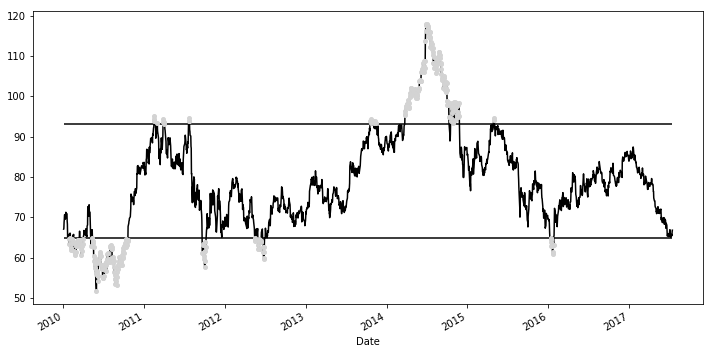

In [46]:
slb_close.plot(color='black', figsize=(12,6))
slb_top_bottom_10.plot(marker='o', style=' ',
                       ms=4, color='lightgray')
xmin = criteria.index[0]
xmax = criteria.index[-1]
plt.hlines(y=[lower_10, upper_10], xmin=xmin, 
           xmax=xmax, color='black')

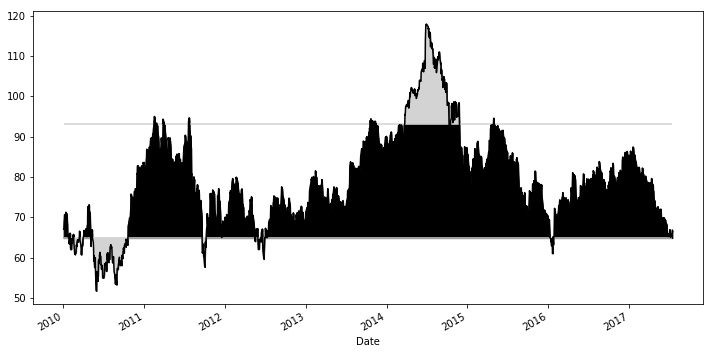

In [47]:
slb_close.plot(color='black', figsize=(12,6))
plt.hlines(y=[lower_10, upper_10],
           xmin=xmin, xmax=xmax, color='lightgray')
plt.fill_between(x=criteria.index, y1=lower_10,
                 y2=slb_close.values, color='black')
plt.fill_between(x=criteria.index, y1=lower_10,
                 y2=slb_close.values, where=slb_close < lower_10,
                 color='lightgray')
plt.fill_between(x=criteria.index, y1=upper_10,
                 y2=slb_close.values, where=slb_close > upper_10,
                 color='lightgray')

## Translating SQL WHERE clauses

In [48]:
employee = pd.read_csv('master/data/employee.csv')
employee.head()

,UNIQUE_ID,POSITION_TITLE,DEPARTMENT,BASE_SALARY,RACE,EMPLOYMENT_TYPE,GENDER,EMPLOYMENT_STATUS,HIRE_DATE,JOB_DATE
0,0,ASSISTANT DIRECTOR (EX LVL),Municipal Courts Department,121862.0,Hispanic/Latino,Full Time,Female,Active,2006-06-12,2012-10-13
1,1,LIBRARY ASSISTANT,Library,26125.0,Hispanic/Latino,Full Time,Female,Active,2000-07-19,2010-09-18
2,2,POLICE OFFICER,Houston Police Department-HPD,45279.0,White,Full Time,Male,Active,2015-02-03,2015-02-03
3,3,ENGINEER/OPERATOR,Houston Fire Department (HFD),63166.0,White,Full Time,Male,Active,1982-02-08,1991-05-25
4,4,ELECTRICIAN,General Services Department,56347.0,White,Full Time,Male,Active,1989-06-19,1994-10-22


In [49]:
employee.DEPARTMENT.value_counts().head()

Houston Police Department-HPD     638
Houston Fire Department (HFD)     384
Public Works & Engineering-PWE    343
Health & Human Services           110
Houston Airport System (HAS)      106
Name: DEPARTMENT, dtype: int64

In [50]:
employee.GENDER.value_counts()

Male      1397
Female     603
Name: GENDER, dtype: int64

In [51]:
employee.BASE_SALARY.describe().astype(int)

count      1886
mean      55767
std       21693
min       24960
25%       40170
50%       54461
75%       66614
max      275000
Name: BASE_SALARY, dtype: int32

In [52]:
depts = ['Houston Police Department-HPD',
         'Houston Fire Department (HFD)']
criteria_dept = employee.DEPARTMENT.isin(depts)
criteria_gender = employee.GENDER == 'Female'
criteria_sal = (employee.BASE_SALARY >= 80000) & \
               (employee.BASE_SALARY <= 120000)

In [53]:
criteria_final = (criteria_dept &
                  criteria_gender &
                  criteria_sal)

In [54]:
select_columns = ['UNIQUE_ID', 'DEPARTMENT',
                  'GENDER', 'BASE_SALARY']
employee.loc[criteria_final, select_columns].head()

,UNIQUE_ID,DEPARTMENT,GENDER,BASE_SALARY
61,61,Houston Fire Department (HFD),Female,96668.0
136,136,Houston Police Department-HPD,Female,81239.0
367,367,Houston Police Department-HPD,Female,86534.0
474,474,Houston Police Department-HPD,Female,91181.0
513,513,Houston Police Department-HPD,Female,81239.0


In [55]:
criteria_sal = employee.BASE_SALARY.between(80000, 120000)

In [56]:
top_5_depts = employee.DEPARTMENT.value_counts().index[:5]
criteria = ~employee.DEPARTMENT.isin(top_5_depts)
employee[criteria]

,UNIQUE_ID,POSITION_TITLE,DEPARTMENT,BASE_SALARY,RACE,EMPLOYMENT_TYPE,GENDER,EMPLOYMENT_STATUS,HIRE_DATE,JOB_DATE
0,0,ASSISTANT DIRECTOR (EX LVL),Municipal Courts Department,121862.0,Hispanic/Latino,Full Time,Female,Active,2006-06-12,2012-10-13
1,1,LIBRARY ASSISTANT,Library,26125.0,Hispanic/Latino,Full Time,Female,Active,2000-07-19,2010-09-18
4,4,ELECTRICIAN,General Services Department,56347.0,White,Full Time,Male,Active,1989-06-19,1994-10-22
18,18,MAINTENANCE MECHANIC III,General Services Department,40581.0,Hispanic/Latino,Full Time,Male,Active,2008-12-29,2008-12-29
32,32,SENIOR ACCOUNTANT,Finance,46963.0,Black or African American,Full Time,Male,Active,1991-02-11,2016-02-13
37,37,ASSISTANT SHOP MANAGER,Fleet Management Department,51438.0,White,Full Time,Male,Active,1995-11-30,2016-03-12
57,57,SEMI-SKILLED LABORER,Solid Waste Management,27622.0,Black or African American,Full Time,Male,Active,2015-08-31,2015-08-31
71,71,COUNCIL INTERN (EXECUTIVE LEVEL),City Council,NaN,Hispanic/Latino,Part Time 30,Male,Active,2015-06-08,2016-02-13
73,73,ADMINISTRATIVE SPECIALIST,Human Resources Dept.,55939.0,Black or African American,Full Time,Female,Active,2011-12-19,2013-11-23
74,74,SENIOR SIDELOADER OPERATOR,Solid Waste Management,38459.0,Black or African American,Full Time,Male,Active,2004-09-07,2005-07-09


## Determining the normality of stock market returns

In [57]:
amzn = pd.read_csv('master/data/amzn_stock.csv', index_col='Date',
                   parse_dates=['Date'])
amzn.head()

,Open,High,Low,Close,Volume
Date,,,,,
2010-01-04,136.25,136.61,133.14,133.90,7600543
2010-01-05,133.43,135.48,131.81,134.69,8856456
2010-01-06,134.60,134.73,131.65,132.25,7180977
2010-01-07,132.01,132.32,128.80,130.00,11030124
2010-01-08,130.56,133.68,129.03,133.52,9833829


In [58]:
amzn_daily_return = amzn.Close.pct_change()
amzn_daily_return.head(11)

Date
2010-01-04         NaN
2010-01-05    0.005900
2010-01-06   -0.018116
2010-01-07   -0.017013
2010-01-08    0.027077
2010-01-11   -0.024041
2010-01-12   -0.022715
2010-01-13    0.013820
2010-01-14   -0.013632
2010-01-15   -0.001649
2010-01-19    0.003697
Name: Close, dtype: float64

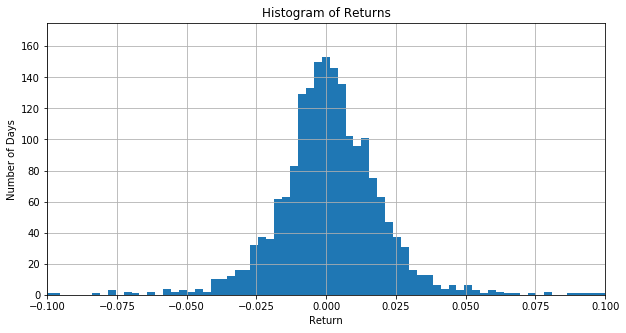

In [59]:
amzn_daily_return = amzn_daily_return.dropna()
amzn_daily_return.hist(bins=100, figsize=(10,5))
plt.xlabel('Return')
plt.ylabel('Number of Days')
plt.title('Histogram of Returns')
plt.axis([-0.1, 0.1, 0, 175])
plt.grid(True)
plt.show()

In [60]:
mean = amzn_daily_return.mean()
mean

0.0012631309530525448

In [61]:
std = amzn_daily_return.std()
std

0.019861559267099153

In [62]:
abs_z_score = amzn_daily_return.sub(mean).abs().div(std)
abs_z_score

Date
2010-01-05    0.233456
2010-01-06    0.975694
2010-01-07    0.920188
2010-01-08    1.299686
2010-01-11    1.274043
2010-01-12    1.207266
2010-01-13    0.632229
2010-01-14    0.749937
2010-01-15    0.146621
2010-01-19    0.122527
2010-01-20    0.785623
2010-01-21    0.272647
2010-01-22    2.127321
2010-01-25    0.527982
2010-01-26    0.410943
2010-01-27    1.314371
2010-01-28    1.281765
2010-01-29    0.311284
2010-02-01    2.689219
2010-02-02    0.381266
2010-02-03    0.354127
2010-02-04    1.399460
2010-02-05    0.566085
2010-02-08    0.303780
2010-02-09    0.453550
2010-02-10    0.349401
2010-02-11    1.107598
2010-02-12    0.243877
2010-02-16    0.959822
2010-02-17    0.586231
                ...   
2017-06-05    0.166958
2017-06-06    0.478795
2017-06-07    0.291303
2017-06-08    0.053627
2017-06-09    1.656377
2017-06-12    0.753225
2017-06-13    0.765014
2017-06-14    0.285362
2017-06-15    0.697806
2017-06-16    1.165651
2017-06-19    0.316677
2017-06-20    0.194126
2017-0

In [63]:
pcts = [abs_z_score.lt(i).mean() for i in range(1,4)]
print('{:.3f} fall within 1 standard deviation. '
      '{:.3f} within 2 and {:.3f} within 3'.format(*pcts))

0.787 fall within 1 standard deviation. 0.956 within 2 and 0.985 within 3


In [64]:
def test_return_normality(stock_data):
    close = stock_data['Close']
    daily_return = close.pct_change().dropna()
    daily_return.hist(bins=100, figsize=(10,5))
    plt.xlabel('Return')
    plt.ylabel('Number of Days')
    plt.title('Histogram of Returns')
    plt.axis([-0.1, 0.1, 0, 175])
    plt.grid(True)
    plt.show()
    mean = daily_return.mean()
    std = daily_return.std()
    
    abs_z_score = abs(daily_return - mean) / std
    pcts = [abs_z_score.lt(i).mean() for i in range(1,4)]
    
    print('{:.3f} fall within 1 standard deviation. '
          '{:.3f} within 2 and {:.3f} within 3'.format(*pcts))

In [65]:
slb = pd.read_csv('master/data/slb_stock.csv', index_col='Date',
                  parse_dates=['Date'])

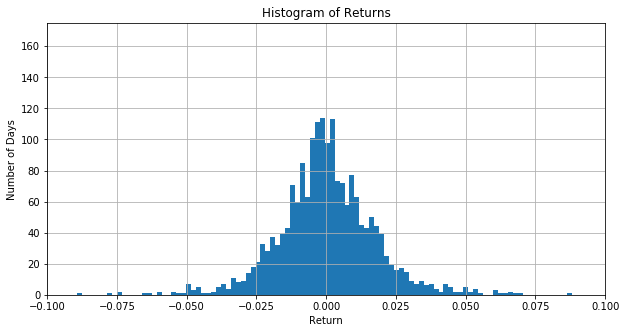

0.742 fall within 1 standard deviation. 0.946 within 2 and 0.986 within 3


In [66]:
test_return_normality(slb)

## Improving readability of boolean indexing with the query method

In [67]:
employee = pd.read_csv('master/data/employee.csv')
depts = ['Houston Police Department-HPD',
         'Houston Fire Department (HFD)']
select_columns = ['UNIQUE_ID', 'DEPARTMENT',
                  'GENDER', 'BASE_SALARY']

In [68]:
employee.head()

,UNIQUE_ID,POSITION_TITLE,DEPARTMENT,BASE_SALARY,RACE,EMPLOYMENT_TYPE,GENDER,EMPLOYMENT_STATUS,HIRE_DATE,JOB_DATE
0,0,ASSISTANT DIRECTOR (EX LVL),Municipal Courts Department,121862.0,Hispanic/Latino,Full Time,Female,Active,2006-06-12,2012-10-13
1,1,LIBRARY ASSISTANT,Library,26125.0,Hispanic/Latino,Full Time,Female,Active,2000-07-19,2010-09-18
2,2,POLICE OFFICER,Houston Police Department-HPD,45279.0,White,Full Time,Male,Active,2015-02-03,2015-02-03
3,3,ENGINEER/OPERATOR,Houston Fire Department (HFD),63166.0,White,Full Time,Male,Active,1982-02-08,1991-05-25
4,4,ELECTRICIAN,General Services Department,56347.0,White,Full Time,Male,Active,1989-06-19,1994-10-22


In [114]:
qs = "DEPARTMENT in @depts " \
     "and GENDER == 'Female' " \
     "and 80000 <= BASE_SALARY <= 120000"

In [115]:
emp_filtered = employee.query(qs)
emp_filtered[select_columns].head()

,UNIQUE_ID,DEPARTMENT,GENDER,BASE_SALARY
61,61,Houston Fire Department (HFD),Female,96668.0
136,136,Houston Police Department-HPD,Female,81239.0
367,367,Houston Police Department-HPD,Female,86534.0
474,474,Houston Police Department-HPD,Female,91181.0
513,513,Houston Police Department-HPD,Female,81239.0


In [117]:
# if we wanted to find all the female employees that were not a member of the top 10 departments by frequency, we can run
top10_depts = employee.DEPARTMENT.value_counts() \
                                 .index[:10].tolist()
qs = "DEPARTMENT not in @top10_depts and GENDER == 'Female'"
employee_filtered2 = employee.query(qs)
employee_filtered2.head()

,UNIQUE_ID,POSITION_TITLE,DEPARTMENT,BASE_SALARY,RACE,EMPLOYMENT_TYPE,GENDER,EMPLOYMENT_STATUS,HIRE_DATE,JOB_DATE
0,0,ASSISTANT DIRECTOR (EX LVL),Municipal Courts Department,121862.0,Hispanic/Latino,Full Time,Female,Active,2006-06-12,2012-10-13
73,73,ADMINISTRATIVE SPECIALIST,Human Resources Dept.,55939.0,Black or African American,Full Time,Female,Active,2011-12-19,2013-11-23
96,96,ASSISTANT CITY CONTROLLER III,City Controller's Office,59077.0,Asian/Pacific Islander,Full Time,Female,Active,2013-06-10,2013-06-10
117,117,SENIOR ASSISTANT CITY ATTORNEY I,Legal Department,90957.0,Black or African American,Full Time,Female,Active,1998-03-20,2012-07-21
146,146,SENIOR STAFF ANALYST,Houston Information Tech Svcs,74951.0,White,Full Time,Female,Active,2014-03-17,2014-03-17


## Preserving Series with the where method

In [118]:
movie = pd.read_csv('master/data/movie.csv', index_col='movie_title')
fb_likes = movie['actor_1_facebook_likes'].dropna()
fb_likes.head()

movie_title
Avatar                                         1000.0
Pirates of the Caribbean: At World's End      40000.0
Spectre                                       11000.0
The Dark Knight Rises                         27000.0
Star Wars: Episode VII - The Force Awakens      131.0
Name: actor_1_facebook_likes, dtype: float64

In [134]:
fb_likes.describe(percentiles=[.1, .25, .5, .75, .9]) \
        .astype(int)

count      4909
mean       6494
std       15106
min           0
10%         240
25%         607
50%         982
75%       11000
90%       18000
max      640000
Name: actor_1_facebook_likes, dtype: int32

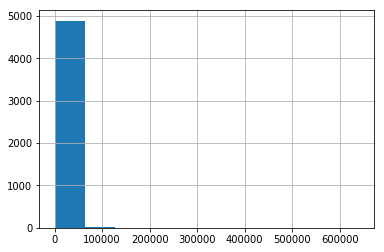

In [136]:
fb_likes.hist()

In [123]:
criteria_high = fb_likes < 20000
criteria_high.mean().round(2)

0.91

In [124]:
fb_likes.where(criteria_high).head()

movie_title
Avatar                                         1000.0
Pirates of the Caribbean: At World's End          NaN
Spectre                                       11000.0
The Dark Knight Rises                             NaN
Star Wars: Episode VII - The Force Awakens      131.0
Name: actor_1_facebook_likes, dtype: float64

In [125]:
fb_likes.where(criteria_high, other=20000).head()

movie_title
Avatar                                         1000.0
Pirates of the Caribbean: At World's End      20000.0
Spectre                                       11000.0
The Dark Knight Rises                         20000.0
Star Wars: Episode VII - The Force Awakens      131.0
Name: actor_1_facebook_likes, dtype: float64

In [126]:
criteria_low = fb_likes > 300
fb_likes_cap = fb_likes.where(criteria_high, other=20000)\
                       .where(criteria_low, 300)
fb_likes_cap.head()

movie_title
Avatar                                         1000.0
Pirates of the Caribbean: At World's End      20000.0
Spectre                                       11000.0
The Dark Knight Rises                         20000.0
Star Wars: Episode VII - The Force Awakens      300.0
Name: actor_1_facebook_likes, dtype: float64

In [127]:
len(fb_likes), len(fb_likes_cap)

(4909, 4909)

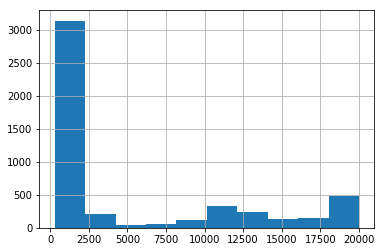

In [128]:
fb_likes_cap.hist()

In [129]:
fb_likes_cap2 = fb_likes.clip(lower=300, upper=20000)
fb_likes_cap2.equals(fb_likes_cap)

True

## Masking DataFrame rows

In [69]:
movie = pd.read_csv('master/data/movie.csv', index_col='movie_title')
c1 = movie['title_year'] >= 2010
c2 = movie['title_year'].isnull()
criteria = c1 | c2

In [70]:
movie.mask(criteria).head()

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
movie_title,,,,,,,,,,,,,,,,,,,,,
Avatar,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000.0
Pirates of the Caribbean: At World's End,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0.0
Spectre,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
The Dark Knight Rises,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Star Wars: Episode VII - The Force Awakens,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [71]:
movie_mask = movie.mask(criteria).dropna(how='all')
movie_mask.head()

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
movie_title,,,,,,,,,,,,,,,,,,,,,
Avatar,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000.0
Pirates of the Caribbean: At World's End,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0.0
Spider-Man 3,Color,Sam Raimi,392.0,156.0,0.0,4000.0,James Franco,24000.0,336530303.0,Action|Adventure|Romance,...,1902.0,English,USA,PG-13,258000000.0,2007.0,11000.0,6.2,2.35,0.0
Harry Potter and the Half-Blood Prince,Color,David Yates,375.0,153.0,282.0,10000.0,Daniel Radcliffe,25000.0,301956980.0,Adventure|Family|Fantasy|Mystery,...,973.0,English,UK,PG,250000000.0,2009.0,11000.0,7.5,2.35,10000.0
Superman Returns,Color,Bryan Singer,434.0,169.0,0.0,903.0,Marlon Brando,18000.0,200069408.0,Action|Adventure|Sci-Fi,...,2367.0,English,USA,PG-13,209000000.0,2006.0,10000.0,6.1,2.35,0.0


In [72]:
movie_boolean = movie[movie['title_year'] < 2010]
movie_mask.equals(movie_boolean)

False

In [73]:
movie_mask.shape == movie_boolean.shape

True

In [74]:
movie_mask.dtypes == movie_boolean.dtypes

color                         True
director_name                 True
num_critic_for_reviews        True
duration                      True
director_facebook_likes       True
actor_3_facebook_likes        True
actor_2_name                  True
actor_1_facebook_likes        True
gross                         True
genres                        True
actor_1_name                  True
num_voted_users              False
cast_total_facebook_likes    False
actor_3_name                  True
facenumber_in_poster          True
plot_keywords                 True
movie_imdb_link               True
num_user_for_reviews          True
language                      True
country                       True
content_rating                True
budget                        True
title_year                    True
actor_2_facebook_likes        True
imdb_score                    True
aspect_ratio                  True
movie_facebook_likes         False
dtype: bool

In [77]:
from pandas.testing import assert_frame_equal
assert_frame_equal(movie_boolean, movie_mask, check_dtype=False)
# No error raised, it's OK

In [78]:
%timeit movie.mask(criteria).dropna(how='all')

13.8 ms ± 116 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [79]:
%timeit movie[movie['title_year'] < 2010]

1.1 ms ± 17.1 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


## Selecting with booleans, integer location, and labels

In [80]:
movie = pd.read_csv('master/data/movie.csv', index_col='movie_title')
c1 = movie['content_rating'] == 'G'
c2 = movie['imdb_score'] < 4
criteria = c1 & c2

In [82]:
movie_loc = movie.loc[criteria]
movie_loc.head()

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
movie_title,,,,,,,,,,,,,,,,,,,,,
The True Story of Puss'N Boots,Color,Jérôme Deschamps,4.0,80.0,0.0,0.0,André Wilms,44.0,NaN,Adventure|Animation|Comedy,...,24.0,English,France,G,25000000.0,2009.0,9.0,2.9,NaN,90
Doogal,Color,Dave Borthwick,31.0,77.0,3.0,593.0,Kylie Minogue,787.0,7382993.0,Adventure|Animation|Comedy|Family|Fantasy,...,114.0,English,USA,G,20000000.0,2006.0,690.0,2.8,1.85,346
Thomas and the Magic Railroad,Color,Britt Allcroft,47.0,85.0,2.0,402.0,Colm Feore,1000.0,15911333.0,Adventure|Comedy|Drama|Family|Fantasy,...,119.0,English,UK,G,19000000.0,2000.0,539.0,3.6,1.85,663
Barney's Great Adventure,Color,Steve Gomer,24.0,76.0,9.0,47.0,Kyla Pratt,595.0,11144518.0,Adventure|Family,...,53.0,English,Canada,G,15000000.0,1998.0,417.0,2.8,1.85,436
Justin Bieber: Never Say Never,Color,Jon M. Chu,84.0,115.0,209.0,41.0,Sean Kingston,569.0,73000942.0,Documentary|Music,...,233.0,English,USA,G,13000000.0,2011.0,69.0,1.6,1.85,62000


In [83]:
movie_loc.equals(movie[criteria])

True

In [85]:
# movie_iloc = movie.iloc[criteria]
# ValueError: iLocation based boolean indexing cannot use an indexable as a mask

In [87]:
movie_iloc = movie.iloc[criteria.values]
movie_iloc.equals(movie_loc)

True

In [88]:
criteria_col = movie.dtypes == np.int64
criteria_col.head()

color                      False
director_name              False
num_critic_for_reviews     False
duration                   False
director_facebook_likes    False
dtype: bool

In [89]:
movie.loc[:, criteria_col].head()

,num_voted_users,cast_total_facebook_likes,movie_facebook_likes
movie_title,,,
Avatar,886204,4834,33000
Pirates of the Caribbean: At World's End,471220,48350,0
Spectre,275868,11700,85000
The Dark Knight Rises,1144337,106759,164000
Star Wars: Episode VII - The Force Awakens,8,143,0


In [90]:
movie.iloc[:, criteria_col.values].head()

,num_voted_users,cast_total_facebook_likes,movie_facebook_likes
movie_title,,,
Avatar,886204,4834,33000
Pirates of the Caribbean: At World's End,471220,48350,0
Spectre,275868,11700,85000
The Dark Knight Rises,1144337,106759,164000
Star Wars: Episode VII - The Force Awakens,8,143,0


In [97]:
cols = ['content_rating', 'imdb_score', 'title_year', 'gross']
movie.loc[criteria, cols].sort_values('imdb_score')

,content_rating,imdb_score,title_year,gross
movie_title,,,,
Justin Bieber: Never Say Never,G,1.6,2011.0,73000942.0
Sunday School Musical,G,2.5,2008.0,NaN
Doogal,G,2.8,2006.0,7382993.0
Barney's Great Adventure,G,2.8,1998.0,11144518.0
The True Story of Puss'N Boots,G,2.9,2009.0,NaN
Thomas and the Magic Railroad,G,3.6,2000.0,15911333.0


In [102]:
col_index = [movie.columns.get_loc(col) for col in cols]
col_index

[20, 24, 22, 8]

In [93]:
movie.iloc[criteria.values, col_index]

,content_rating,imdb_score,title_year,gross
movie_title,,,,
The True Story of Puss'N Boots,G,2.9,2009.0,NaN
Doogal,G,2.8,2006.0,7382993.0
Thomas and the Magic Railroad,G,3.6,2000.0,15911333.0
Barney's Great Adventure,G,2.8,1998.0,11144518.0
Justin Bieber: Never Say Never,G,1.6,2011.0,73000942.0
Sunday School Musical,G,2.5,2008.0,NaN


In [104]:
a = criteria.values
a[:5]

array([False, False, False, False, False])

In [105]:
len(a), len(criteria)

(4916, 4916)

Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "C:\Users\John\Anaconda3\lib\asyncio\events.py", line 88, in _run
    self._context.run(self._callback, *self._args)
  File "C:\Users\John\Anaconda3\lib\asyncio\selector_events.py", line 125, in _read_from_self
    data = self._ssock.recv(4096)
ConnectionResetError: [WinError 10054] Une connexion existante a dû être fermée par l’hôte distant
Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "C:\Users\John\Anaconda3\lib\asyncio\events.py", line 88, in _run
    self._context.run(self._callback, *self._args)
  File "C:\Users\John\Anaconda3\lib\asyncio\selector_events.py", line 125, in _read_from_self
    data = self._ssock.recv(4096)
ConnectionResetError: [WinError 10054] Une connexion existante a dû être fermée par l’hôt

Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "C:\Users\John\Anaconda3\lib\asyncio\events.py", line 88, in _run
    self._context.run(self._callback, *self._args)
  File "C:\Users\John\Anaconda3\lib\asyncio\selector_events.py", line 125, in _read_from_self
    data = self._ssock.recv(4096)
ConnectionResetError: [WinError 10054] Une connexion existante a dû être fermée par l’hôte distant
Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "C:\Users\John\Anaconda3\lib\asyncio\events.py", line 88, in _run
    self._context.run(self._callback, *self._args)
  File "C:\Users\John\Anaconda3\lib\asyncio\selector_events.py", line 125, in _read_from_self
    data = self._ssock.recv(4096)
ConnectionResetError: [WinError 10054] Une connexion existante a dû être fermée par l’hôt

Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "C:\Users\John\Anaconda3\lib\asyncio\events.py", line 88, in _run
    self._context.run(self._callback, *self._args)
  File "C:\Users\John\Anaconda3\lib\asyncio\selector_events.py", line 125, in _read_from_self
    data = self._ssock.recv(4096)
ConnectionResetError: [WinError 10054] Une connexion existante a dû être fermée par l’hôte distant
Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "C:\Users\John\Anaconda3\lib\asyncio\events.py", line 88, in _run
    self._context.run(self._callback, *self._args)
  File "C:\Users\John\Anaconda3\lib\asyncio\selector_events.py", line 125, in _read_from_self
    data = self._ssock.recv(4096)
ConnectionResetError: [WinError 10054] Une connexion existante a dû être fermée par l’hôt

Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "C:\Users\John\Anaconda3\lib\asyncio\events.py", line 88, in _run
    self._context.run(self._callback, *self._args)
  File "C:\Users\John\Anaconda3\lib\asyncio\selector_events.py", line 125, in _read_from_self
    data = self._ssock.recv(4096)
ConnectionResetError: [WinError 10054] Une connexion existante a dû être fermée par l’hôte distant
Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "C:\Users\John\Anaconda3\lib\asyncio\events.py", line 88, in _run
    self._context.run(self._callback, *self._args)
  File "C:\Users\John\Anaconda3\lib\asyncio\selector_events.py", line 125, in _read_from_self
    data = self._ssock.recv(4096)
ConnectionResetError: [WinError 10054] Une connexion existante a dû être fermée par l’hôt

Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "C:\Users\John\Anaconda3\lib\asyncio\events.py", line 88, in _run
    self._context.run(self._callback, *self._args)
  File "C:\Users\John\Anaconda3\lib\asyncio\selector_events.py", line 125, in _read_from_self
    data = self._ssock.recv(4096)
ConnectionResetError: [WinError 10054] Une connexion existante a dû être fermée par l’hôte distant
Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "C:\Users\John\Anaconda3\lib\asyncio\events.py", line 88, in _run
    self._context.run(self._callback, *self._args)
  File "C:\Users\John\Anaconda3\lib\asyncio\selector_events.py", line 125, in _read_from_self
    data = self._ssock.recv(4096)
ConnectionResetError: [WinError 10054] Une connexion existante a dû être fermée par l’hôt

Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "C:\Users\John\Anaconda3\lib\asyncio\events.py", line 88, in _run
    self._context.run(self._callback, *self._args)
  File "C:\Users\John\Anaconda3\lib\asyncio\selector_events.py", line 125, in _read_from_self
    data = self._ssock.recv(4096)
ConnectionResetError: [WinError 10054] Une connexion existante a dû être fermée par l’hôte distant
Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "C:\Users\John\Anaconda3\lib\asyncio\events.py", line 88, in _run
    self._context.run(self._callback, *self._args)
  File "C:\Users\John\Anaconda3\lib\asyncio\selector_events.py", line 125, in _read_from_self
    data = self._ssock.recv(4096)
ConnectionResetError: [WinError 10054] Une connexion existante a dû être fermée par l’hôt

Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "C:\Users\John\Anaconda3\lib\asyncio\events.py", line 88, in _run
    self._context.run(self._callback, *self._args)
  File "C:\Users\John\Anaconda3\lib\asyncio\selector_events.py", line 125, in _read_from_self
    data = self._ssock.recv(4096)
ConnectionResetError: [WinError 10054] Une connexion existante a dû être fermée par l’hôte distant
Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "C:\Users\John\Anaconda3\lib\asyncio\events.py", line 88, in _run
    self._context.run(self._callback, *self._args)
  File "C:\Users\John\Anaconda3\lib\asyncio\selector_events.py", line 125, in _read_from_self
    data = self._ssock.recv(4096)
ConnectionResetError: [WinError 10054] Une connexion existante a dû être fermée par l’hôt

Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "C:\Users\John\Anaconda3\lib\asyncio\events.py", line 88, in _run
    self._context.run(self._callback, *self._args)
  File "C:\Users\John\Anaconda3\lib\asyncio\selector_events.py", line 125, in _read_from_self
    data = self._ssock.recv(4096)
ConnectionResetError: [WinError 10054] Une connexion existante a dû être fermée par l’hôte distant
Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "C:\Users\John\Anaconda3\lib\asyncio\events.py", line 88, in _run
    self._context.run(self._callback, *self._args)
  File "C:\Users\John\Anaconda3\lib\asyncio\selector_events.py", line 125, in _read_from_self
    data = self._ssock.recv(4096)
ConnectionResetError: [WinError 10054] Une connexion existante a dû être fermée par l’hôt

Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "C:\Users\John\Anaconda3\lib\asyncio\events.py", line 88, in _run
    self._context.run(self._callback, *self._args)
  File "C:\Users\John\Anaconda3\lib\asyncio\selector_events.py", line 125, in _read_from_self
    data = self._ssock.recv(4096)
ConnectionResetError: [WinError 10054] Une connexion existante a dû être fermée par l’hôte distant
Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "C:\Users\John\Anaconda3\lib\asyncio\events.py", line 88, in _run
    self._context.run(self._callback, *self._args)
  File "C:\Users\John\Anaconda3\lib\asyncio\selector_events.py", line 125, in _read_from_self
    data = self._ssock.recv(4096)
ConnectionResetError: [WinError 10054] Une connexion existante a dû être fermée par l’hôt

Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "C:\Users\John\Anaconda3\lib\asyncio\events.py", line 88, in _run
    self._context.run(self._callback, *self._args)
  File "C:\Users\John\Anaconda3\lib\asyncio\selector_events.py", line 125, in _read_from_self
    data = self._ssock.recv(4096)
ConnectionResetError: [WinError 10054] Une connexion existante a dû être fermée par l’hôte distant
Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "C:\Users\John\Anaconda3\lib\asyncio\events.py", line 88, in _run
    self._context.run(self._callback, *self._args)
  File "C:\Users\John\Anaconda3\lib\asyncio\selector_events.py", line 125, in _read_from_self
    data = self._ssock.recv(4096)
ConnectionResetError: [WinError 10054] Une connexion existante a dû être fermée par l’hôt

Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "C:\Users\John\Anaconda3\lib\asyncio\events.py", line 88, in _run
    self._context.run(self._callback, *self._args)
  File "C:\Users\John\Anaconda3\lib\asyncio\selector_events.py", line 125, in _read_from_self
    data = self._ssock.recv(4096)
ConnectionResetError: [WinError 10054] Une connexion existante a dû être fermée par l’hôte distant
Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "C:\Users\John\Anaconda3\lib\asyncio\events.py", line 88, in _run
    self._context.run(self._callback, *self._args)
  File "C:\Users\John\Anaconda3\lib\asyncio\selector_events.py", line 125, in _read_from_self
    data = self._ssock.recv(4096)
ConnectionResetError: [WinError 10054] Une connexion existante a dû être fermée par l’hôt

Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "C:\Users\John\Anaconda3\lib\asyncio\events.py", line 88, in _run
    self._context.run(self._callback, *self._args)
  File "C:\Users\John\Anaconda3\lib\asyncio\selector_events.py", line 125, in _read_from_self
    data = self._ssock.recv(4096)
ConnectionResetError: [WinError 10054] Une connexion existante a dû être fermée par l’hôte distant
Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "C:\Users\John\Anaconda3\lib\asyncio\events.py", line 88, in _run
    self._context.run(self._callback, *self._args)
  File "C:\Users\John\Anaconda3\lib\asyncio\selector_events.py", line 125, in _read_from_self
    data = self._ssock.recv(4096)
ConnectionResetError: [WinError 10054] Une connexion existante a dû être fermée par l’hôt

Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "C:\Users\John\Anaconda3\lib\asyncio\events.py", line 88, in _run
    self._context.run(self._callback, *self._args)
  File "C:\Users\John\Anaconda3\lib\asyncio\selector_events.py", line 125, in _read_from_self
    data = self._ssock.recv(4096)
ConnectionResetError: [WinError 10054] Une connexion existante a dû être fermée par l’hôte distant
Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "C:\Users\John\Anaconda3\lib\asyncio\events.py", line 88, in _run
    self._context.run(self._callback, *self._args)
  File "C:\Users\John\Anaconda3\lib\asyncio\selector_events.py", line 125, in _read_from_self
    data = self._ssock.recv(4096)
ConnectionResetError: [WinError 10054] Une connexion existante a dû être fermée par l’hôt

Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "C:\Users\John\Anaconda3\lib\asyncio\events.py", line 88, in _run
    self._context.run(self._callback, *self._args)
  File "C:\Users\John\Anaconda3\lib\asyncio\selector_events.py", line 125, in _read_from_self
    data = self._ssock.recv(4096)
ConnectionResetError: [WinError 10054] Une connexion existante a dû être fermée par l’hôte distant
Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "C:\Users\John\Anaconda3\lib\asyncio\events.py", line 88, in _run
    self._context.run(self._callback, *self._args)
  File "C:\Users\John\Anaconda3\lib\asyncio\selector_events.py", line 125, in _read_from_self
    data = self._ssock.recv(4096)
ConnectionResetError: [WinError 10054] Une connexion existante a dû être fermée par l’hôt

Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "C:\Users\John\Anaconda3\lib\asyncio\events.py", line 88, in _run
    self._context.run(self._callback, *self._args)
  File "C:\Users\John\Anaconda3\lib\asyncio\selector_events.py", line 125, in _read_from_self
    data = self._ssock.recv(4096)
ConnectionResetError: [WinError 10054] Une connexion existante a dû être fermée par l’hôte distant
Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "C:\Users\John\Anaconda3\lib\asyncio\events.py", line 88, in _run
    self._context.run(self._callback, *self._args)
  File "C:\Users\John\Anaconda3\lib\asyncio\selector_events.py", line 125, in _read_from_self
    data = self._ssock.recv(4096)
ConnectionResetError: [WinError 10054] Une connexion existante a dû être fermée par l’hôt

Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "C:\Users\John\Anaconda3\lib\asyncio\events.py", line 88, in _run
    self._context.run(self._callback, *self._args)
  File "C:\Users\John\Anaconda3\lib\asyncio\selector_events.py", line 125, in _read_from_self
    data = self._ssock.recv(4096)
ConnectionResetError: [WinError 10054] Une connexion existante a dû être fermée par l’hôte distant
Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "C:\Users\John\Anaconda3\lib\asyncio\events.py", line 88, in _run
    self._context.run(self._callback, *self._args)
  File "C:\Users\John\Anaconda3\lib\asyncio\selector_events.py", line 125, in _read_from_self
    data = self._ssock.recv(4096)
ConnectionResetError: [WinError 10054] Une connexion existante a dû être fermée par l’hôt

Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "C:\Users\John\Anaconda3\lib\asyncio\events.py", line 88, in _run
    self._context.run(self._callback, *self._args)
  File "C:\Users\John\Anaconda3\lib\asyncio\selector_events.py", line 125, in _read_from_self
    data = self._ssock.recv(4096)
ConnectionResetError: [WinError 10054] Une connexion existante a dû être fermée par l’hôte distant
Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "C:\Users\John\Anaconda3\lib\asyncio\events.py", line 88, in _run
    self._context.run(self._callback, *self._args)
  File "C:\Users\John\Anaconda3\lib\asyncio\selector_events.py", line 125, in _read_from_self
    data = self._ssock.recv(4096)
ConnectionResetError: [WinError 10054] Une connexion existante a dû être fermée par l’hôt

Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "C:\Users\John\Anaconda3\lib\asyncio\events.py", line 88, in _run
    self._context.run(self._callback, *self._args)
  File "C:\Users\John\Anaconda3\lib\asyncio\selector_events.py", line 125, in _read_from_self
    data = self._ssock.recv(4096)
ConnectionResetError: [WinError 10054] Une connexion existante a dû être fermée par l’hôte distant
Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "C:\Users\John\Anaconda3\lib\asyncio\events.py", line 88, in _run
    self._context.run(self._callback, *self._args)
  File "C:\Users\John\Anaconda3\lib\asyncio\selector_events.py", line 125, in _read_from_self
    data = self._ssock.recv(4096)
ConnectionResetError: [WinError 10054] Une connexion existante a dû être fermée par l’hôt

Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "C:\Users\John\Anaconda3\lib\asyncio\events.py", line 88, in _run
    self._context.run(self._callback, *self._args)
  File "C:\Users\John\Anaconda3\lib\asyncio\selector_events.py", line 125, in _read_from_self
    data = self._ssock.recv(4096)
ConnectionResetError: [WinError 10054] Une connexion existante a dû être fermée par l’hôte distant
Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "C:\Users\John\Anaconda3\lib\asyncio\events.py", line 88, in _run
    self._context.run(self._callback, *self._args)
  File "C:\Users\John\Anaconda3\lib\asyncio\selector_events.py", line 125, in _read_from_self
    data = self._ssock.recv(4096)
ConnectionResetError: [WinError 10054] Une connexion existante a dû être fermée par l’hôt

Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "C:\Users\John\Anaconda3\lib\asyncio\events.py", line 88, in _run
    self._context.run(self._callback, *self._args)
  File "C:\Users\John\Anaconda3\lib\asyncio\selector_events.py", line 125, in _read_from_self
    data = self._ssock.recv(4096)
ConnectionResetError: [WinError 10054] Une connexion existante a dû être fermée par l’hôte distant
Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "C:\Users\John\Anaconda3\lib\asyncio\events.py", line 88, in _run
    self._context.run(self._callback, *self._args)
  File "C:\Users\John\Anaconda3\lib\asyncio\selector_events.py", line 125, in _read_from_self
    data = self._ssock.recv(4096)
ConnectionResetError: [WinError 10054] Une connexion existante a dû être fermée par l’hôt

Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "C:\Users\John\Anaconda3\lib\asyncio\events.py", line 88, in _run
    self._context.run(self._callback, *self._args)
  File "C:\Users\John\Anaconda3\lib\asyncio\selector_events.py", line 125, in _read_from_self
    data = self._ssock.recv(4096)
ConnectionResetError: [WinError 10054] Une connexion existante a dû être fermée par l’hôte distant
Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "C:\Users\John\Anaconda3\lib\asyncio\events.py", line 88, in _run
    self._context.run(self._callback, *self._args)
  File "C:\Users\John\Anaconda3\lib\asyncio\selector_events.py", line 125, in _read_from_self
    data = self._ssock.recv(4096)
ConnectionResetError: [WinError 10054] Une connexion existante a dû être fermée par l’hôt

Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "C:\Users\John\Anaconda3\lib\asyncio\events.py", line 88, in _run
    self._context.run(self._callback, *self._args)
  File "C:\Users\John\Anaconda3\lib\asyncio\selector_events.py", line 125, in _read_from_self
    data = self._ssock.recv(4096)
ConnectionResetError: [WinError 10054] Une connexion existante a dû être fermée par l’hôte distant
Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "C:\Users\John\Anaconda3\lib\asyncio\events.py", line 88, in _run
    self._context.run(self._callback, *self._args)
  File "C:\Users\John\Anaconda3\lib\asyncio\selector_events.py", line 125, in _read_from_self
    data = self._ssock.recv(4096)
ConnectionResetError: [WinError 10054] Une connexion existante a dû être fermée par l’hôt

Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "C:\Users\John\Anaconda3\lib\asyncio\events.py", line 88, in _run
    self._context.run(self._callback, *self._args)
  File "C:\Users\John\Anaconda3\lib\asyncio\selector_events.py", line 125, in _read_from_self
    data = self._ssock.recv(4096)
ConnectionResetError: [WinError 10054] Une connexion existante a dû être fermée par l’hôte distant
Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "C:\Users\John\Anaconda3\lib\asyncio\events.py", line 88, in _run
    self._context.run(self._callback, *self._args)
  File "C:\Users\John\Anaconda3\lib\asyncio\selector_events.py", line 125, in _read_from_self
    data = self._ssock.recv(4096)
ConnectionResetError: [WinError 10054] Une connexion existante a dû être fermée par l’hôt

Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "C:\Users\John\Anaconda3\lib\asyncio\events.py", line 88, in _run
    self._context.run(self._callback, *self._args)
  File "C:\Users\John\Anaconda3\lib\asyncio\selector_events.py", line 125, in _read_from_self
    data = self._ssock.recv(4096)
ConnectionResetError: [WinError 10054] Une connexion existante a dû être fermée par l’hôte distant
Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "C:\Users\John\Anaconda3\lib\asyncio\events.py", line 88, in _run
    self._context.run(self._callback, *self._args)
  File "C:\Users\John\Anaconda3\lib\asyncio\selector_events.py", line 125, in _read_from_self
    data = self._ssock.recv(4096)
ConnectionResetError: [WinError 10054] Une connexion existante a dû être fermée par l’hôt

Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "C:\Users\John\Anaconda3\lib\asyncio\events.py", line 88, in _run
    self._context.run(self._callback, *self._args)
  File "C:\Users\John\Anaconda3\lib\asyncio\selector_events.py", line 125, in _read_from_self
    data = self._ssock.recv(4096)
ConnectionResetError: [WinError 10054] Une connexion existante a dû être fermée par l’hôte distant
Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "C:\Users\John\Anaconda3\lib\asyncio\events.py", line 88, in _run
    self._context.run(self._callback, *self._args)
  File "C:\Users\John\Anaconda3\lib\asyncio\selector_events.py", line 125, in _read_from_self
    data = self._ssock.recv(4096)
ConnectionResetError: [WinError 10054] Une connexion existante a dû être fermée par l’hôt

Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "C:\Users\John\Anaconda3\lib\asyncio\events.py", line 88, in _run
    self._context.run(self._callback, *self._args)
  File "C:\Users\John\Anaconda3\lib\asyncio\selector_events.py", line 125, in _read_from_self
    data = self._ssock.recv(4096)
ConnectionResetError: [WinError 10054] Une connexion existante a dû être fermée par l’hôte distant
Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "C:\Users\John\Anaconda3\lib\asyncio\events.py", line 88, in _run
    self._context.run(self._callback, *self._args)
  File "C:\Users\John\Anaconda3\lib\asyncio\selector_events.py", line 125, in _read_from_self
    data = self._ssock.recv(4096)
ConnectionResetError: [WinError 10054] Une connexion existante a dû être fermée par l’hôt

Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "C:\Users\John\Anaconda3\lib\asyncio\events.py", line 88, in _run
    self._context.run(self._callback, *self._args)
  File "C:\Users\John\Anaconda3\lib\asyncio\selector_events.py", line 125, in _read_from_self
    data = self._ssock.recv(4096)
ConnectionResetError: [WinError 10054] Une connexion existante a dû être fermée par l’hôte distant
Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "C:\Users\John\Anaconda3\lib\asyncio\events.py", line 88, in _run
    self._context.run(self._callback, *self._args)
  File "C:\Users\John\Anaconda3\lib\asyncio\selector_events.py", line 125, in _read_from_self
    data = self._ssock.recv(4096)
ConnectionResetError: [WinError 10054] Une connexion existante a dû être fermée par l’hôt

Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "C:\Users\John\Anaconda3\lib\asyncio\events.py", line 88, in _run
    self._context.run(self._callback, *self._args)
  File "C:\Users\John\Anaconda3\lib\asyncio\selector_events.py", line 125, in _read_from_self
    data = self._ssock.recv(4096)
ConnectionResetError: [WinError 10054] Une connexion existante a dû être fermée par l’hôte distant
Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "C:\Users\John\Anaconda3\lib\asyncio\events.py", line 88, in _run
    self._context.run(self._callback, *self._args)
  File "C:\Users\John\Anaconda3\lib\asyncio\selector_events.py", line 125, in _read_from_self
    data = self._ssock.recv(4096)
ConnectionResetError: [WinError 10054] Une connexion existante a dû être fermée par l’hôt

In [94]:
movie.loc[[True, False, True], [True, False, False, True]]

,color,duration
movie_title,,
Avatar,Color,178.0
Spectre,Color,148.0
